# Decision Tree Classifier Model

The code here represents the Decision Tree Classifier machine learning model to predict whether a person is affected by covid or pneumonia or whether the person is in normal state using the chest X-Ray. The Chest X-Ray images have been preproccessed and then the features have been extracted and stored in .mat files. We now load these files and create the Decision Tree Classifier model. Also, we print the Decision Tree as well as the evaluation metrics for the model. 

In [1]:
#Importing the required packages
from utils import*
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
# Mentioning the working directory
source_dir='./'

In [3]:
# Accessing covid.mat file and getting the data from the file
covid_features=sio.loadmat(os.path.join(source_dir,'covid.mat')) 
covid_features=covid_features['covid'] 
# Accessing normal.mat file and getting the data from the file
normal_features=sio.loadmat(os.path.join(source_dir,'normal.mat')) 
normal_features=normal_features['normal']  
# Accessing pneumonia.mat file and getting the data from the file
pneumonia_features=sio.loadmat(os.path.join(source_dir,'pneumonia.mat')) 
pneumonia_features=pneumonia_features['pneumonia']  

In [4]:
# Extracting the scores-i.e the inputs and storing it in X
X=np.concatenate((covid_features[:,:-1],normal_features[:,:-1],pneumonia_features[:,:-1]), axis=0)#inputs
# Extracting the target labels, the last column alone
y=np.concatenate((covid_features[:,-1],normal_features[:,-1],pneumonia_features[:,-1]), axis=0)#target labels

In [5]:
# Normalization of the data between 0 and 1
min_max_scaler=MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [6]:
# We use Kernel to reduce the feature components to 64 for the input data
transformer = KernelPCA(n_components=64, kernel='linear')
X = transformer.fit_transform(X)

In [7]:
# We do the splitting of data set and set the training data to be 80% ,i.e, test data = 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# From that 80%, test data fraction is set as 25% to get a better output as there is more randomness in the dataset for testing
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [8]:
# Printing the size for each of the data
print("Size of train data:", np.shape(X_train))
print("Size of train label:", np.shape(y_train))
print("Size of test data:", np.shape(X_test))
print("Size of test label:", np.shape(y_test))

Size of train data: (225, 64)
Size of train label: (225,)
Size of test data: (76, 64)
Size of test label: (76,)


In [9]:
# Creating the Decision Tree Classifier object
clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=3, class_weight='balanced')

In [10]:
# Training the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [11]:
# Predicting/ testing the model
y_pred = clf.predict(X_test)
#print(y_pred)

# A list of arrays of class labels
print(clf.classes_) 
# Importance of each features in splitting
print(clf.feature_importances_) 

[0. 1. 2.]
[0.         0.29432495 0.33056063 0.         0.35607829 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.01903613 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]


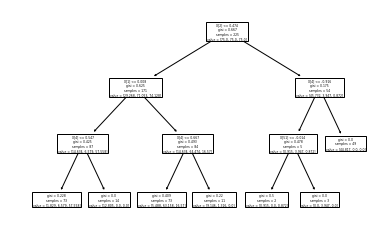

In [12]:
# Plotting the decision tree
plot_tree(clf) 
plt.show()

#Obtaining the evaluation metrics for the model
conf_mat = confusion_matrix(y_test, y_pred) # Confusion matrix
accuracy = accuracy_score(y_test, y_pred) # Accuracy of prediction
precision = precision_score(y_test, y_pred, average='macro') # Precision
recall = recall_score(y_test, y_pred, average='macro') # Recall
f1 = f1_score(y_test, y_pred, average='macro') # F1-score

In [13]:
print("The Accuracy of the model is: " + str(accuracy))

The Accuracy of the model is: 0.7894736842105263


In [14]:
print("The Precision of the model is: " + str(precision))

The Precision of the model is: 0.8005698005698005


In [15]:
print("The Recall of the model is: " + str(recall))

The Recall of the model is: 0.8125


In [16]:
print("The F1-Score for the model is: " + str(f1))

The F1-Score for the model is: 0.7837710775402745


In [17]:
print("The Confusion matrix is: ")
conf_mat

The Confusion matrix is: 


array([[23,  4,  3],
       [ 0, 15,  1],
       [ 0,  8, 22]], dtype=int64)